In this kernell, we will try to predict is cancer bad or good? Also we will see the distribution of features and some comparison about features.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


**FIRST LOOK TO DATA AND CLEANING IT**

diagnosis = Malignant for M, Benign for B
* Malignant ---->>> dangereous
* Benign ----->>> harmless


Ten real-valued features are computed for each cell nucleus: 

* a) radius (mean of distances from center to points on the perimeter) 
* b) texture (standard deviation of gray-scale values) 
* c) perimeter 
* d) area 
* e) smoothness (local variation in radius lengths) 
* f) compactness (perimeter^2 / area - 1.0) 
* g) concavity (severity of concave portions of the contour) 
* h) concave points (number of concave portions of the contour) 
* i) symmetry 
* j) fractal dimension ("coastline approximation" - 1)


In this kernell we will use the upper features of data.


In [2]:
data = pd.read_csv("../input/data.csv")
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [3]:

data = data.loc[:,["diagnosis","radius_mean",
            "fractal_dimension_mean",
           "texture_mean","perimeter_mean",
           "area_mean", "smoothness_mean",
           "compactness_mean","concavity_mean",
           "concave points_mean","symmetry_mean",
           "fractal_dimension_mean"]]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
diagnosis                 569 non-null object
radius_mean               569 non-null float64
fractal_dimension_mean    569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
dtypes: float64(11), object(1)
memory usage: 53.4+ KB


In [4]:
data.describe()

,radius_mean,fractal_dimension_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,0.062798,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,0.007060,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,0.049960,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,0.057700,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,0.061540,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,0.066120,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,0.097440,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'fractal_dimension_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean'],
      dtype='object')

**VISUALIZATION OF DATA**

In this part, we will make a comparison between each feature with another feature, so we will find the which feature effects how to our data? Is there a positive correlation or negative correlation between each other.

B    357
M    212
Name: diagnosis, dtype: int64

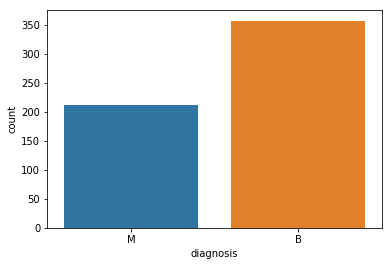

In [6]:
sns.countplot(data.diagnosis)

data["diagnosis"].value_counts()

In [7]:
target_M_data = data[data.diagnosis == "M"] 
target_B_data = data[data.diagnosis == "B"]

trace1 = go.Scatter(
                    x= target_M_data.radius_mean,
                    y= target_M_data.area_mean,
                    mode = "markers",
                    name = "Malignant",
                    marker = dict(color = "rgba(120,15,150,0.8)"),
                    text = target_M_data.diagnosis)

trace2 = go.Scatter(
                    x= target_B_data.radius_mean,
                    y= target_B_data.area_mean,
                    mode = "markers",
                    name = "Beningn",
                    marker = dict(color = "rgba(66,222,222,0.8)"),
                    text = target_B_data.diagnosis)

scatter_data = [trace1, trace2]

layout = dict(title = "M or B according to radius and area",
             xaxis = dict(title = "radius"),
             yaxis = dict(title = "area")
             )

fig = dict(layout = layout, data = scatter_data)

iplot(fig)


The upper graph explains the radius,area relationship and also the positions of Malignant and Bening cells. It can be easily seen that, when the cell radius and area increased, it is closer to the Malignant.

In [8]:
trace1 = go.Scatter(
                    x= target_M_data.radius_mean,
                    y= target_M_data.smoothness_mean,
                    mode = "markers",
                    name = "Malignant",
                    marker = dict(color = "rgba(120,15,150,0.8)"),
                    text = target_M_data.diagnosis)

trace2 = go.Scatter(
                    x= target_B_data.radius_mean,
                    y= target_B_data.smoothness_mean,
                    mode = "markers",
                    name = "Beningn",
                    marker = dict(color = "rgba(66,222,222,0.8)"),
                    text = target_B_data.diagnosis)

scatter_data = [trace1, trace2]

layout = dict(title = "M or B according to radius and smoothness",
             xaxis = dict(title = "radius"),
             yaxis = dict(title = "smoothness")
             )

fig = dict(layout = layout, data = scatter_data)

iplot(fig)



According to the upper graph, we realize that smoothness is not a good classifier for our data. Since we do not observe a clear difference between to cell type.

<BarContainer object of 569 artists>

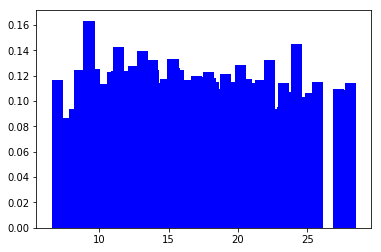

In [9]:
plt.bar(data.radius_mean, data.smoothness_mean, color="blue")

This graph also proves our statement, because same cituation is here. All the bars have a similar length.

In [10]:

trace1 = go.Scatter(
                    x= target_M_data.concavity_mean,
                    y= target_M_data.compactness_mean,
                    mode = "markers",
                    name = "Malignant",
                    marker = dict(color = "rgba(120,15,150,0.8)"),
                    text = target_M_data.diagnosis)

trace2 = go.Scatter(
                    x= target_B_data.concavity_mean,
                    y= target_B_data.compactness_mean,
                    mode = "markers",
                    name = "Beningn",
                    marker = dict(color = "rgba(66,222,222,0.8)"),
                    text = target_B_data.diagnosis)

scatter_data = [trace1, trace2]

layout = dict(title = "M or B according to concavity and compactness",
             xaxis = dict(title = "concavity"),
             yaxis = dict(title = "compactness")
             )

fig = dict(layout = layout, data = scatter_data)

iplot(fig)

It is clearly seen that dangerous cell (Malignant) has a bigger concavity and compactness rather than Beningn.

In [11]:

trace1 = go.Scatter(
            x = target_M_data.symmetry_mean,
            y = target_M_data.texture_mean,
            mode = "markers",
            name = "Malignant",
            marker = dict(color = "rgba(200,5,5,0.8)"),
            text = target_M_data.diagnosis

)

trace2 = go.Scatter(
            x = target_B_data.symmetry_mean,
            y = target_B_data.texture_mean,
            mode = "markers",
            name = "Beningn",
            marker = dict(color = "rgba(5,5,200,0.8)"),
            text = target_B_data.diagnosis

)


graph_data = [trace1, trace2]

layout = dict(title =  "M or B according to symmetry and texture",
             xaxis = dict(title = "symmetry"),
             yaxis = dict(title = "texture"))


fig = dict(layout = layout,data = graph_data)


iplot(fig)



Clearly see that when symmetry and texture mean increase also chance of being malignant increases.

Lets create another column and call it first look. In that column we just put datas into the groups considering their radius.

probably good     259
test is needed    192
probably bad      118
Name: first_look, dtype: int64

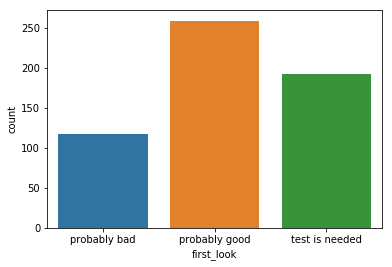

In [12]:
radius_group = []

for each in data.radius_mean:
    if each <= 13:
        radius_group.append("probably good")
    elif 13 < each < 17:
        radius_group.append("test is needed")
    else:
        radius_group.append("probably bad")
        
        
data["first_look"] = radius_group

sns.countplot(data.first_look)

data["first_look"].value_counts()




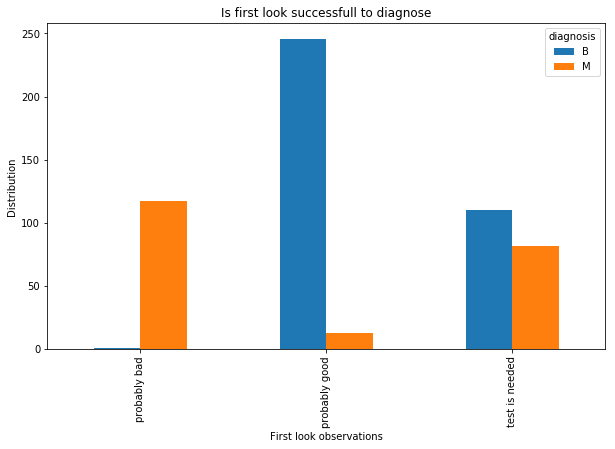

In [13]:

pd.crosstab(data.first_look,data.diagnosis).plot(kind="bar",figsize=(10,6))

plt.title("Is first look successfull to diagnose")
plt.xlabel("First look observations")
plt.ylabel("Distribution")
plt.show()

Yeah probably directly looking to radius is a good option for the first look but also some exceptions are exist.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

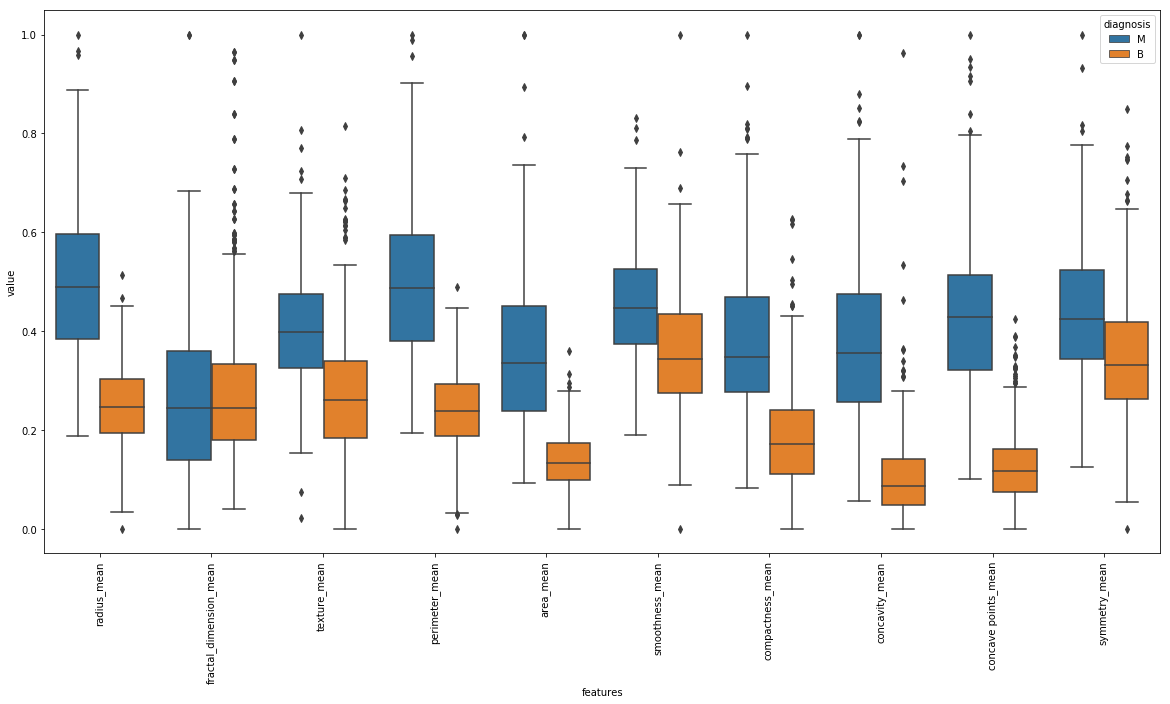

In [14]:
y = data.diagnosis

x = data.drop(["diagnosis","first_look"],axis=1)

x_norm = (x-x.min())/(x.max()-x.min())

new_data = pd.concat([y,x_norm],axis=1)
new_data = pd.melt(new_data,
                  id_vars ="diagnosis",
                  var_name = "features",
                  value_name = "value")

plt.figure(figsize = (20,10))

sns.boxplot(x="features", y="value", hue = "diagnosis", data=new_data)
plt.xticks(rotation = 90)



In the upper graph, we can see the effect of the each feature individually.

**FUTURE ENGINEERING**

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size =0.3,random_state=42)

print("X train :  {}".format(x_train.shape))
print("X test : {}".format(x_test.shape))
print("Y train : {}".format(y_train.shape))
print("Y test : {}".format(y_test.shape))

X train :  (398, 11)
X test : (171, 11)
Y train : (398,)
Y test : (171,)


**KNN ALGORITHM**

The most accuracy is 0.9590643274853801 with the neighbor value of 2


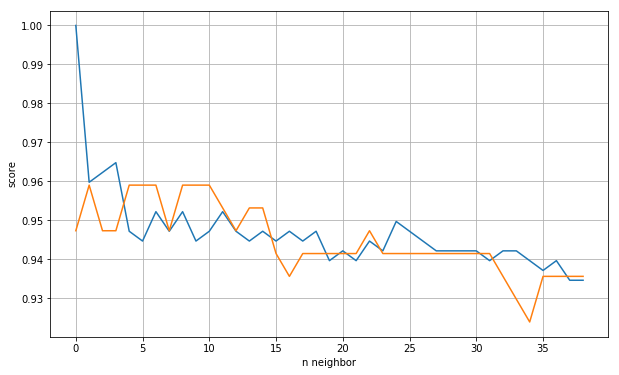

In [16]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score =[]

for each in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))


plt.figure(figsize = (10,6))
plt.plot(train_score, label = "Train accuracy")
plt.plot(test_score, label = "Test accuracy")
plt.grid()
plt.xlabel("n neighbor")
plt.ylabel("score")


check = 0
count =0
for num in test_score:
    if check < num :
        check = num
        count += 1
    else:
        pass

print("The most accuracy is {} with the neighbor value of {}".format(check,count))



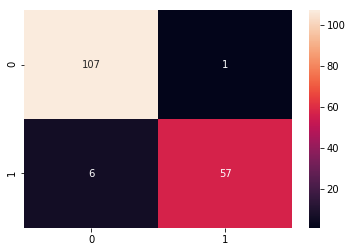

In [17]:
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(x_train,y_train)


y_pred = knn2.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm,annot= True,fmt="d")


* With KNN algorithm we get %95 accuracy with using K=2
* The other K values also give us different result
* As can be seen in the confusion matrix,totally we can not predict only 7 values.(6+1)


**REGRESSION**




Text(0, 0.5, 'concave point')

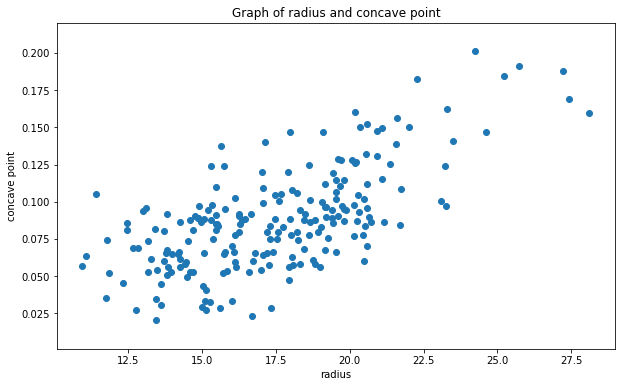

In [18]:
data1 = data[data.diagnosis =="M"]


x = np.array(data1.loc[:,"radius_mean"]).reshape(-1,1)

y= np.array(data1.loc[:,"concave points_mean"]).reshape(-1,1)

plt.figure(figsize = (10,6))

plt.scatter(x=x,y=y)
plt.title("Graph of radius and concave point")
plt.xlabel("radius")
plt.ylabel("concave point")



Score of regression : 0.45632608222149695


Text(0, 0.5, 'concave point')

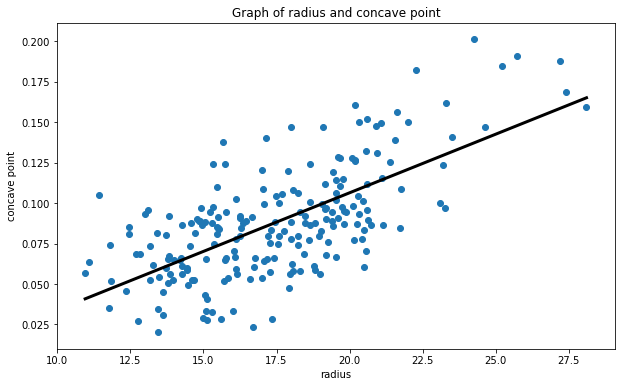

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)


reg.fit(x,y)
predict = reg.predict(predict_space)

print("Score of regression : {}".format(reg.score(x,y)))

plt.figure(figsize = (10,6))
plt.plot(predict_space, predict, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.title("Graph of radius and concave point")
plt.xlabel("radius")
plt.ylabel("concave point")








We can check our data with cross validation. In the below I choose k as 5, so it means that data is predicted 5 times.

In [20]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.04675829 0.50576381 0.5084442  0.36913813 0.54847422]
CV scores average:  0.3957157298969388


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



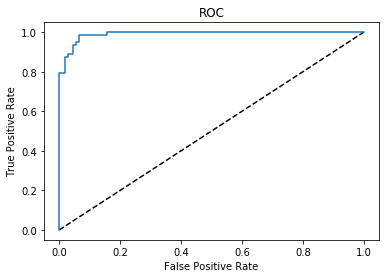

In [21]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == "M" else 0 for i in data.loc[:,"diagnosis"]]
x,y = data.loc[:,(data.columns != "diagnosis") & (data.columns != "class_binary") &(data.columns != "first_look")],data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

**RANDOM FOREST**

In [22]:
from sklearn.ensemble import RandomForestClassifier

x_train , x_test, y_train, y_test = train_test_split(x_norm,y,test_size = 0.3,random_state = 42)
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

score = rf.score(x_test,y_test)

print("Accuracy of the Random Forest Algorithm : {}".format(score))



Accuracy of the Random Forest Algorithm : 0.9590643274853801


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



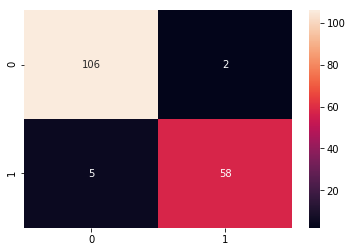

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm, annot = True,fmt="d")

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_true,y_pred)

print("Classification report : {}".format(report))

Classification report :               precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



**KMEANS**

Text(0.5, 1.0, 'Distribution')

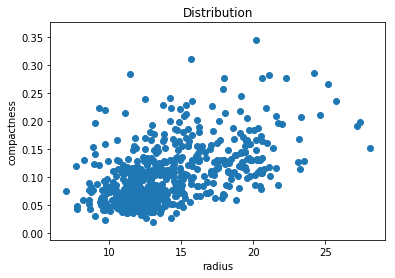

In [25]:
plt.scatter(data["radius_mean"], data["compactness_mean"])
plt.xlabel("radius")
plt.ylabel("compactness")
plt.title("Distribution")

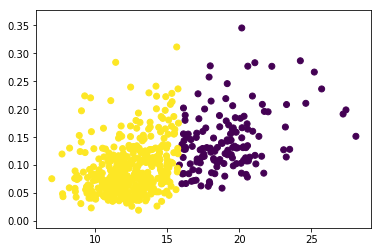

In [26]:
new_data = data.loc[:,["radius_mean","compactness_mean"]]
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 2)

kmean.fit(new_data)

labels = kmean.predict(new_data)

plt.scatter(data["radius_mean"], data["compactness_mean"], c = labels)

In [27]:
df = pd.DataFrame({"label" : labels , "class" : data.diagnosis} )

new_df = pd.crosstab(df["label"],df["class"])
new_df

class,B,M
label,,
0,6,136
1,351,76


In the upper table represents the how much class "B" and class "M" in the label 0 and label 1. For example,
* In label 0 (violet) 351 B and 76 M located.
* In label 1 (yellow) 6 B and 136 M located.